**SAMPLING AND DISTRIBUTIONS**

<p style="background-image: linear-gradient(#0aa98f, #ffffff 10%); font-weight:bold;"> 
    &nbsp; Sampling </p>
    
Sampling is the process of selecting a subset (sample) from a larger population to make inferences about the population. Since studying the entire population is often impractical, researchers collect and analyze a representative sample.

<p style="background-image: linear-gradient(#0aa98f, #ffffff 10%); font-weight:bold;"> 
    &nbsp; Resampling </p>
    
The process of taking repeated samples from observed data; includes both bootstrap and permutation (shuffling) procedures.

<p style="background-image: linear-gradient(#0aa98f, #ffffff 10%); font-weight:bold;"> 
    &nbsp; Bootstrap </p>
    
Bootstrapping is a statistical technique used to estimate the distribution of a statistic (like the mean, median, or variance) by **repeatedly resampling with replacement** from a dataset. This method allows researchers to assess the variability of their estimates without making strong assumptions about the underlying population distribution.

> **1.** Draw a sample value, record it and replace it. <br>
> **2.** Repeat $n$ times. <br>
> **3.** Record the mean of the $n$ resampled values. <br>
> **4.** Repeat steps 1-3 $N$ times. <br>
> **5.** Use the $N$ results to: <br>
>> **a.** Calculate their standard deviation (this estimates sample mean standard error). <br>
>> **b.** Produce a histogram or boxplot. <br>
>> **c.** Find a confidence interval.
>
> $N$, the number of iterations of the bootstrap, is set arbitrarily. The more iteration we do, the more accurate the estimate of the standard error, or the confidence interval.

<p style="background-image: linear-gradient(#0aa98f, #ffffff 10%); font-weight:bold;"> 
    &nbsp; Bootstrap Confidence Interval </p>
    
People, while acknowledging uncertainty, nonetheless place undue faith in an estimate when it is presented as a single number. Presenting an estimate not as a single number but as a range is one way to counteract this tendency. Confidence intervals do this in a manner grounded in statistical sampling principles.

An $x\%$ confidence interval around a sample estimate should, on average, contain similar sample estimates $x\%$ of the time (when similar sampling procedure is follwed).
> **1.** Draw a random sample of size $n$ with replacement from the data (a resample). <br>
> **2.** Record the statistic of interest for the resample. <br>
> **3.** Repeat steps 1-2 $N$ times. <br>
> **4.** For an $x%$ confidence interval, trim $[(100-x)/2]\%$ of the $N$ resample results from either end of the distribution. <br>
> **5.** The trim points are the endpoints of an $x\%$ bootstrap confidence interval. <br>


<p style="background-image: linear-gradient(to right, #0aa98f, #68dab2)"> &nbsp; </p>

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.utils import resample

import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

np.random.seed(0)

In [2]:
data = sns.load_dataset('diamonds')
data.tail(3)

,carat,cut,color,clarity,depth,table,price,x,y,z
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [3]:
price = data['price']
print('Population Mean:', price.mean())
print('Population Median:', price.median())

Population Mean: 3932.799721913237
Population Median: 2401.0


<p style="background-image: linear-gradient(to right, #0aa98f, #68dab2)"> &nbsp; </p>

<p style="background-image: linear-gradient(#0aa98f, #ffffff 10%); font-weight:bold;"> 
    &nbsp; Sampling </p>

In [4]:
n=1000

sample_1 = pd.Series(price.sample(n))
sample_5 = pd.Series([price.sample(5).mean() for _ in range(n)])
sample_30 = pd.Series([price.sample(30).mean() for _ in range(n)])
sample_100 = pd.Series([price.sample(100).mean() for _ in range(n)])

print('Means')
print(f" {str('Population').ljust(20)} {price.mean():.2f}")
print(f" {str('Sample Mean   1').ljust(20)} {sample_1.mean():.2f}")
print(f" {str('Sample Mean   5').ljust(20)} {sample_5.mean():.2f}")
print(f" {str('Sample Mean  30').ljust(20)} {sample_30.mean():.2f}")
print(f" {str('Sample Mean 100').ljust(20)} {sample_100.mean():.2f}")

Means
 Population           3932.80
 Sample Mean   1      3751.26
 Sample Mean   5      3939.57
 Sample Mean  30      3983.38
 Sample Mean 100      3921.54


In [5]:
# def take_sample(n, iter=1000):
#     temp = pd.Series([price.sample(n).mean() for _ in range(iter)])
#     print(f"\t{str(f'Sample Mean {n}').ljust(20)} {temp.mean():.2f}")

# print('Means')
# print(f"\t{str('Population').ljust(20)} {price.mean():.2f}")
# for n in [1, 5, 30, 100]:
#     take_sample(n)

<p style="background-image: linear-gradient(#0aa98f, #ffffff 10%); font-weight:bold;"> 
    &nbsp; Bootstrap </p>

In [6]:
results = [resample(price).median() for _ in range(1000)]
results = pd.Series(results)

print('Bootstrap Statistics:')
print(f' original: {price.median()}')
print(f' bias: {results.mean() - price.median()}')
print(f' std. error: {results.std()}')

Bootstrap Statistics:
 original: 2401.0
 bias: 3.2339999999999236
 std. error: 16.302285376857704


<p style="background-image: linear-gradient(#0aa98f, #ffffff 10%); font-weight:bold;"> 
    &nbsp; Bootstrap Confidence Intervals </p>

In [7]:
sample = resample(price, n_samples=20, replace=False)
# sample = price.sample(20)

results = [resample(sample).mean() for _ in range(500)]
results = pd.Series(results)

print(f"{str('Population Mean').ljust(17)} : {price.mean():.2f}")
print(f"{str('Sample Mean').ljust(17)} : {sample.mean():.2f}")
print(f"{str('Results Mean').ljust(17)} : {results.mean():.2f}")

Population Mean   : 3932.80
Sample Mean       : 4108.80
Results Mean      : 4127.60


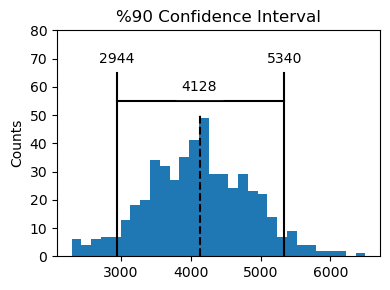

In [8]:
plt.figure(figsize=(4,3))

plt.hist(results, bins=30)

confidence_interval = results.quantile([0.05, 0.95])
plt.plot(confidence_interval, [55, 55], color='black')
for x in confidence_interval:
    plt.plot([x, x], [0, 65], color='black')
    plt.text(x, 70, f'{x:.0f}', 
            horizontalalignment='center', verticalalignment='center')

meanPrice = results.mean()
plt.plot([meanPrice, meanPrice], [0, 50], color='black', linestyle='--')
plt.text(meanPrice, 60, f'{meanPrice:.0f}',
        bbox=dict(facecolor='white', edgecolor='white', alpha=0.5),
        horizontalalignment='center', verticalalignment='center')

plt.ylim(0, 80)
plt.ylabel('Counts')
plt.title('%90 Confidence Interval')
plt.tight_layout()
plt.show()

<p style="background-image: linear-gradient(to right, #0aa98f, #68dab2)"> &nbsp; </p>

<p style="background-image: linear-gradient(#0aa98f, #ffffff 10%); font-weight:bold;"> 
    &nbsp; DISTRIBUTIONS </p>

A probability distribution describes how the probabilities of different possible outcomes of a random variable are distributed. There are two main types of probability distributions:
> **Discrete Probability Distribution:** Deals with discrete random variables (variables that can take distinct or countable values). The probability mass function (PMF) gives the probability that a discrete random variable is exactly equal to a specific value.
> 
> **Continuous Probability Distribution:** Deals with continuous random variables (variables that can take an infinite number of possible values). The probability density function (PDF) represents the likelihood of the random variable taking a value within a certain range, though the probability of any specific value is 0.


<p style="background-image: linear-gradient(#0aa98f, #ffffff 10%); font-weight:bold;"> 
    &nbsp; PMF - PDF - CDF </p>

> **Probability Mass Function - PMF** 
> > Assigns a probability to each possible state of a discrete random variable. In a discrete probability distribution graph, the y-axis gives the probability of the random variable occurring.
>
> **Probability Density Function - PDF**
> > It describes the probabilities of the values of a continuous random variable in a given interval. However, instead of direct values of the probabilities, it expresses the proportions of the probabilities in a given interval.
> > 
> > Because it is a continuous variable, the probability on a single value is 0. Instead, it specifies the probabilities over an interval. The sum of the PDF must be 1 because it covers all possible values of a variable.
>
> **Cumulative Distribution Function - CDF**
> > It is a function that specifies the probability of a random variable up to a given value. CDF expresses the probability that a random variable is less than or equal to a given value.
>
> The PDF specifies the probability density of a random variable in a continuous form, while the probability mass function (PMF) specifies the probabilities of certain values of a random variable. The PMF is used for discrete variables, while the PDF is used for continuous variables.

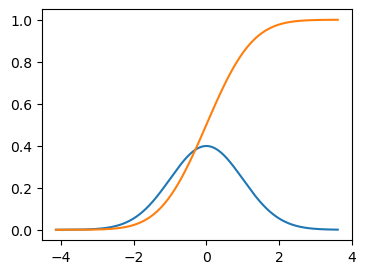

In [9]:
x = np.random.randn(10000)
pdf = stats.norm.pdf(x)
cdf = stats.norm.cdf(x)

sns.lineplot(x=x, y=pdf)
sns.lineplot(x=x, y=cdf)
plt.gcf().set_size_inches(4,3)
plt.show()

<p style="background-image: linear-gradient(#0aa98f, #ffffff 10%); font-weight:bold;"> 
    &nbsp; Bernoulli Distribution  </p>

> It is a discrete probability distribution used to model an experiment with only two outcomes (success vs failure | positive vs negative | desirable vs undesirable). The Bernoulli distribution depends on a single parameter: $p$, the probability of success. If the probability of success is $p$, the probability of failure is $1-p$.

Success Probability : 0.4
Failure Probability : 0.6
Expected Value: 0.4
Variance: 0.24


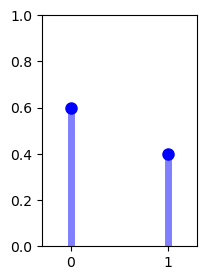

In [10]:
p = 0.4     # 4/52 0.5
dist = stats.bernoulli(p)
success = dist.pmf(k=1)
failure = dist.pmf(k=0)

print('Success Probability :', success)
print('Failure Probability :', failure)
print('Expected Value:', dist.expect())
print('Variance:', dist.var())


plt.figure(figsize=(2,3))
x = np.arange(dist.ppf(0.1), dist.ppf(0.99)+1)

plt.plot(x, dist.pmf(x), 'bo', ms=8)
plt.vlines(x, 0, dist.pmf(x), colors='b', lw=5, alpha=0.5)
plt.xlim(-0.3, 1.3)
plt.ylim(0, 1)
plt.show()

<p style="background-image: linear-gradient(#0aa98f, #ffffff 10%); font-weight:bold;"> 
    &nbsp; Binomial Distribution </p>

> It is a discrete probability distribution used to model situations where a given experiment is repeatable and each repetition involves independent trials with two outcomes (success or failure). The binomial distribution depends on two parameters: $n$, the number of trials, and $p$, the probability of success in each trial.

0.375 → Probability of one time head
0.500 → Probability of one or fewer heads


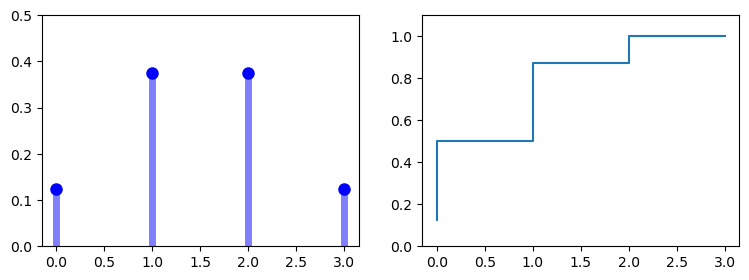

In [11]:
# flip a coin 3 times
n, p = 3, 0.5
dist = stats.binom(n=n, p=p)

print(f'{dist.pmf(1):.3f} → Probability of one time head')
print(f'{dist.cdf(1):.3f} → Probability of one or fewer heads')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9,3))
x = np.arange(dist.ppf(0.1), dist.ppf(0.99)+1)

ax1.plot(x, dist.pmf(x), 'bo', ms=8)
ax1.vlines(x, 0, dist.pmf(x), colors='b', lw=5, alpha=0.5)
ax1.set_ylim(0,0.5)

ax2.plot(x, dist.cdf(x), drawstyle='steps')
ax2.set_ylim(0,1.1)

plt.show()

<p style="background-image: linear-gradient(#0aa98f, #ffffff 10%); font-weight:bold;"> 
    &nbsp; Poisson Distribution </p>

> A discrete probability distribution used to model the number of rare events. In particular, it is used to estimate the number of events per unit of time interval or space. The Poisson distribution depends on only one parameter: $λ$, the mean number of events. The variance for poisson distribution is also $λ$.

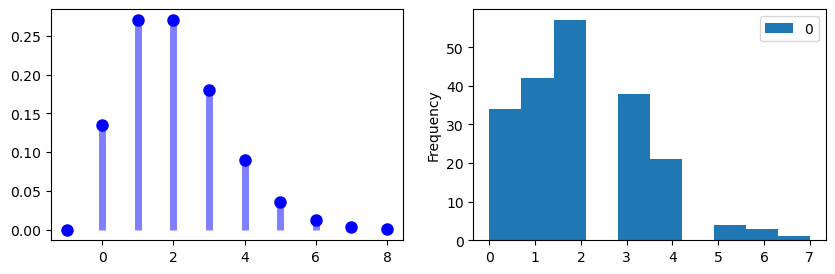

In [12]:
dist = stats.poisson(2)

fig, axs = plt.subplots(ncols=2, figsize=(10,3))
x = np.arange(dist.ppf(0), dist.ppf(0.9999))

axs[0].plot(x, dist.pmf(x), 'bo', ms=8)
axs[0].vlines(x, 0, dist.pmf(x), colors='b', lw=5, alpha=0.5)

sample = dist.rvs(size=200)
sample = pd.DataFrame(sample)
sample.plot.hist(ax=axs[1]) # , bins=30

plt.show()

<p style="background-image: linear-gradient(#f87674, #ffffff 10%); font-weight:bold;"> 
    &nbsp; Exponential Distribution </p>


> It is the probability distribution of the distance between events in a Poisson point process. A process in which events occur continuously and independently at a constant average rate; the distance parameter could be any meaningful mono-dimensional measure of the process.
>
> The exponential distribution is a special case of the gamma distributions, with gamma shape parameter ``a = 1``

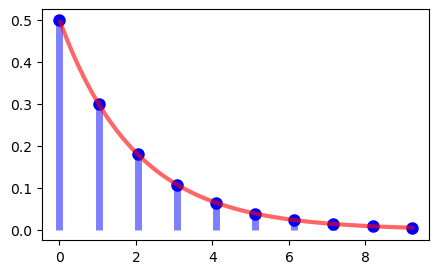

In [13]:
dist = stats.expon(scale=2)

plt.figure(figsize=(5,3))
x1 = np.linspace(dist.ppf(0), dist.ppf(0.99), 10)
x2 = np.linspace(dist.ppf(0.01), dist.ppf(0.99), 100)

plt.plot(x1, dist.pdf(x1), 'bo', ms=8)
plt.vlines(x1, 0, dist.pdf(x1), colors='b', lw=5, alpha=0.5)

plt.plot(x2, dist.pdf(x2), 'r-', lw=3, alpha=0.6)

plt.show()

<p style="background-image: linear-gradient(#f87674, #ffffff 10%); font-weight:bold;"> 
    &nbsp; Weibull Distribution </p>

> It is a continuous probability distribution. It models a broad range of random variables, largely in the nature of a time to failure or time between events.
>
>  The Weibull distribution is an extension of the exponential distribution in which the event rate is allowed to change. It depends on shape parameter $\beta$ and scale parameter $\eta$.<br>
>  &emsp; $\beta>1$ &emsp; → the probability of an event increases over time<br>
>  &emsp; $\beta<1$ &emsp; → the probability of an event decreases over time
>
> In real life, event rate does not remain constant. If the change in the event rate occurs over a longer period than the typical interval, there is no problem. The analysis is done in segments where the event is relatively constant. But if the event rate varies over the interval, the exponential or Poisson distribution cannot be used.
>

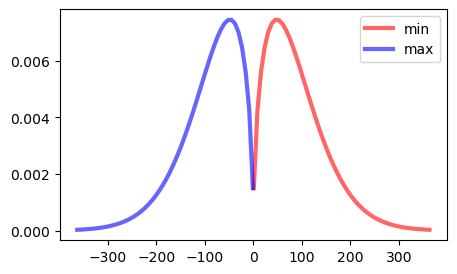

In [14]:
dist_min = stats.weibull_min(1.5, scale=100)
dist_max = stats.weibull_max(1.5, scale=100)

plt.figure(figsize=(5,3))

x_min = np.linspace(dist_min.ppf(0.001), dist_min.ppf(0.999))
x_max = np.linspace(dist_max.ppf(0.001), dist_max.ppf(0.999))
# 0.000001 - 0.999999

plt.plot(x_min, dist_min.pdf(x_min), 'r', lw=3, alpha=0.6, label='min')
plt.plot(x_max, dist_max.pdf(x_max), 'b', lw=3, alpha=0.6, label='max')

plt.legend()
plt.show()

<p style="background-image: linear-gradient(#0aa98f, #ffffff 10%); font-weight:bold;"> 
    &nbsp; Discrete Uniform Distribution </p>

> A discrete probability distribution in which values in a given interval are selected with equal probability. This distribution is used to model the values of a random variable within a given interval, each of which has an equal probability of being selected. The discrete uniform distribution depends on two parameters, $a$ and $b$, where $a$ and $b$ represent a given range (lower and upper bound).

Probability of an event occuring: %16.67
Expected Value: 3.5
Variance: 2.92


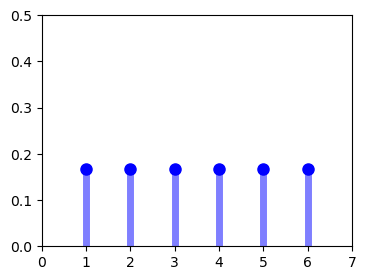

In [15]:
dist = stats.randint(1, 7)

prob = dist.pmf(k=5)
print(f'Probability of an event occuring: %{prob*100:.2f}')

print(f'Expected Value: {dist.expect()}')
print(f'Variance: {dist.var():.2f}')


plt.figure(figsize=(4,3))
x = np.arange(dist.ppf(0.1), dist.ppf(0.99)+1)

plt.plot(x, dist.pmf(x), 'bo', ms=8)
plt.vlines(x, 0, dist.pmf(x), colors='b', lw=5, alpha=0.5)
plt.xlim(0, 7)
plt.ylim(0, 0.5)
plt.show()

<p style="background-image: linear-gradient(#0aa98f, #ffffff 10%); font-weight:bold;"> 
    &nbsp; Continuous Uniform Distribution </p>

> It is a continuous probability distribution in which values within a given interval are selected with equal probability. This distribution is used to model the probability distribution of a continuous variable over a given interval, where the probability of selecting any value along that interval is the same. The continuous uniform distribution depends on two parameters, $a$ and $b$, where $a$ and $b$ represents a certain range (lower and upper bound).

Probability of an event occuring: %2.00
Expected Value: 25.0
Variance: 208.33


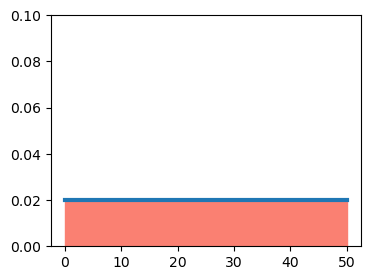

In [16]:
_min, _range = 0, 50
dist = stats.uniform(_min, _range)

prob = dist.pdf(5)
print(f'Probability of an event occuring: %{prob*100:.2f}')

print(f'Expected Value: {dist.expect()}')
print(f'Variance: {dist.var():.2f}')


plt.figure(figsize=(4,3))
x = np.linspace(_min, _range, 100)

plt.plot(x, dist.pdf(x), linewidth=3)
plt.fill_between(x, dist.pdf(x), color='salmon')
plt.ylim(0, 0.1)
plt.show()

<p style="background-image: linear-gradient(#0aa98f, #FFFFFF 10%); font-weight:bold;"> 
    &nbsp; Normal Distribution (Gasussian Distribution - Bell Curve) </p>

> It refers to a distribution in which data is concentrated in the midpoints and sparse at the extremes. It is used to model data observed in many natural processes. The normal distribution depends on two parameters: $\mu$ (mean) and $\sigma^2$ (variance). The mean indicates the central position of the distribution, while the variance indicates how spread out the distribution of the data is. Standard deviation ($\sigma$), the square root of the variance, can also be used instead of variance.
>
> According to the central limit theorem, regardless of the structure of a population, the mean of the samples to be selected from it will converge to the population mean and show a normal distribution.
>
> **Standard Normal Distribution →** $\mu = 0$ and $\sigma = 1$ <br>
> A non-standrad distribution can be transformed into a standard normal distribution through normalization. <br>
> <div style="text-align: center;"> $Z=(X−μ) / σ$ </div>
>
> <br>https://www.intmath.com/counting-probability/normal-distribution-graph-interactive.php

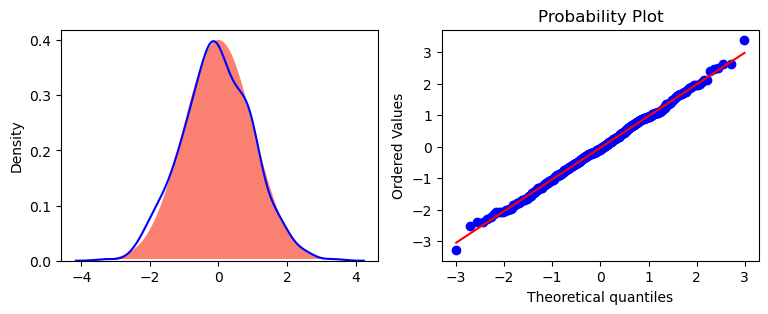

In [17]:
perfect = np.linspace(-3, 3, 500)
dist = stats.norm.rvs(size=500)  # standard normal
# dist = stats.norm.rvs(120, 20, size=100)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9,3))

ax1.fill(perfect, stats.norm.pdf(perfect), color='salmon') # use only with standard normal distribution
sns.kdeplot(dist,  color='blue', ax=ax1)
stats.probplot(dist, plot=ax2)

plt.show()

<p style="background-image: linear-gradient(#0aa98f, #ffffff 10%); font-weight:bold;"> 
    &nbsp; Long Tail </p>

> A perfect normal distribution is unlikely to be observed in real life.

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


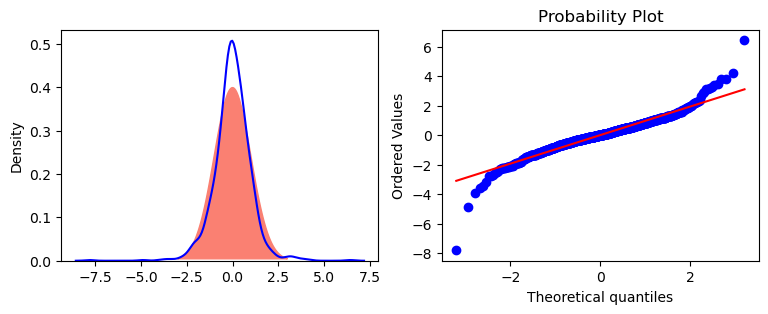

In [18]:
# Microsoft Stock
msft = yf.download('MSFT', start="2020-01-01", end="2024-01-01",
                  multi_level_index=False)
msft = msft['Close']
msft = np.diff(np.log(msft[msft>0])) # np.log(msft)
sn_msft = (msft-msft.mean())/msft.std() # standard normal

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9,3))

ax1.fill(perfect, stats.norm.pdf(perfect), color='salmon')
sns.kdeplot(sn_msft,  color='blue', ax=ax1) # msft
stats.probplot(sn_msft, plot=ax2) # msft
plt.show()

<p style="background-image: linear-gradient(#0aa98f, #ffffff 10%); font-weight:bold;"> 
    &nbsp; Student's t Distribution </p>

> It is a continuous probability distribution that generalizes the standard normal distribution. Like the latter, it is symmetric around zero and bell-shaped. However, it has heavier tails and the amount of probability mass in the tails is controlled by the parameter $df$. <br>
> &emsp; $df=1$ &emsp;&emsp; → fat tails <br>
> &emsp; $df→∞$ &emsp;&nbsp; → becomes normal distribuion
>
>  T-distributions have a greater chance for extreme values than normal distributions, and as a result have fatter tails.

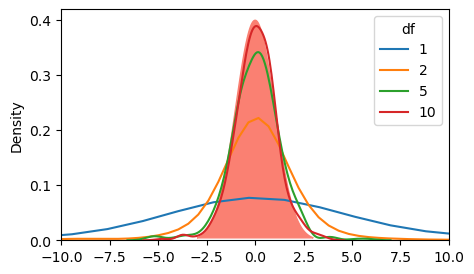

In [19]:
df_list =  [1, 2, 5, 10]

plt.figure(figsize=(5,3))
plt.fill(perfect, stats.norm.pdf(perfect), color='salmon')

for df in df_list:
    dist = stats.t.rvs(df=df, size=500)
    sns.kdeplot(dist, label=df)

plt.xlim(-10,10)
plt.legend(title='df')
plt.show()

<p style="background-image: linear-gradient(#0aa98f, #ffffff 10%); font-weight:bold;"> 
    &nbsp; Chi-Square Distibution </p>

> The chi-square distribution is a continuous probability distribution that arises in statistics. It is widely used in inferential statistics to assess relationships between categorical variables and to evaluate how well models fit observed data.
>

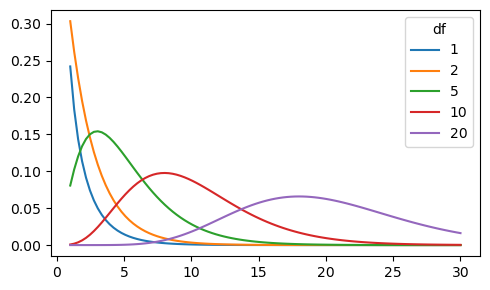

In [20]:
x = np.linspace(1, 30, 100)
df_list =  [1, 2, 5, 10, 20]

plt.figure(figsize=(5, 3))

for df in df_list:
    dist = stats.chi2.pdf(x, df=df)
    plt.plot(x, dist, label=df)

plt.legend(title='df')
plt.tight_layout()
plt.show()

<p style="background-image: linear-gradient(to right, #0aa98f, #68dab2)"> &nbsp; </p>